In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in data
df_trips = pd.read_csv("/home/ctchervenkov/Documents/data/scenarios/switzerland_2018_10pct/output_trips.csv", sep=";")

In [3]:
# filter only car trips
df_trips_car = df_trips[df_trips["mode"] == "car"]

In [4]:
# get end times
df_trips_car.loc[:,"endTime"] = df_trips_car.loc[:,"start_time"] + df_trips_car.loc[:,"travel_time"]

/home/ctchervenkov/.local/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/ctchervenkov/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
# generic vehicle type (1)
df_trips_car["vehicleType"] = 1

/home/ctchervenkov/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
# rename columns
renames = {"person_id":"vehicleId",
           "start_time":"startTime",
           "origin_x":"startX",
           "origin_y":"startY",
           "destination_x":"endX",
           "destination_y":"endY",
           "preceedingPurpose":"startActivityType",
           "followingPurpose":"endActivityType",
           "network_distance":"travelDistance_km"}

df_trips_car = df_trips_car.rename(index=str, columns=renames)

In [7]:
# only keep desired columns
df_trips_car = df_trips_car[["vehicleId","vehicleType","startTime","endTime","startX","startY","endX","endY","startActivityType","endActivityType","travelDistance_km"]]

In [8]:
# set to desired format
df_trips_car.loc[:,"vehicleId"] = df_trips_car.loc[:,"vehicleId"].astype(int)
df_trips_car.loc[:,"vehicleType"] = df_trips_car.loc[:,"vehicleType"].astype(int)
df_trips_car.loc[:,"startTime"] = df_trips_car.loc[:,"startTime"].astype(float)
df_trips_car.loc[:,"endTime"] = df_trips_car.loc[:,"endTime"].astype(float)
df_trips_car.loc[:,"startX"] = df_trips_car.loc[:,"startX"].astype(float)
df_trips_car.loc[:,"startY"] = df_trips_car.loc[:,"startY"].astype(float)
df_trips_car.loc[:,"endX"] = df_trips_car.loc[:,"endX"].astype(float)
df_trips_car.loc[:,"endY"] = df_trips_car.loc[:,"endY"].astype(float)
df_trips_car.loc[:,"startActivityType"] = df_trips_car.loc[:,"startActivityType"].astype(str)
df_trips_car.loc[:,"endActivityType"] = df_trips_car.loc[:,"endActivityType"].astype(str)
df_trips_car.loc[:,"travelDistance_km"] = df_trips_car.loc[:,"travelDistance_km"].astype(float)

In [9]:
# remove trips under 1 m
df_trips_car = df_trips_car[df_trips_car["travelDistance_km"] > 0.001]

In [10]:
# sort by timestamp
df_trips_car = df_trips_car.sort_values(by=["startTime","endTime"])

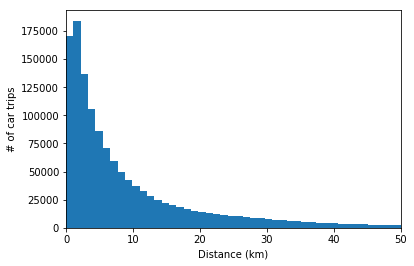

In [11]:
# plot distance distribution
data = df_trips_car["travelDistance_km"].values
plt.hist(data, bins=500)
plt.xlim((0,50))
plt.xlabel("Distance (km)")
plt.ylabel("# of car trips")
plt.show()

In [12]:
# save to file
df_trips_car.to_csv("/home/ctchervenkov/Documents/projects/sccer_ja/switzerland_10pct/01-Time_of_trips-origin_destination_vehicle_trip_distance.csv", sep=",", index=False)